In [1]:

import _init_
from constants import *
from set_path import *
from config import *
from functions import *
import seaborn as sns

In [2]:
plt.rcParams['font.size']=28
plt.rcParams['axes.linewidth']=3.
plt.rcParams['xtick.major.size']=12
plt.rcParams['xtick.minor.size']=1
plt.rcParams['xtick.major.width']=2
plt.rcParams['xtick.minor.width']=2.
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.major.size']=12
plt.rcParams['ytick.minor.size']=6
plt.rcParams['ytick.major.width']=2
plt.rcParams['ytick.minor.width']=2
plt.rcParams['ytick.direction']='in'

In [3]:
# folder_list = ['SummitData/GasGravity/Production2pc/R4-0.2Zsol/',  \
#                'SummitData/GasGravity/Production2pc/R8-0.2Zsol/',\
#               'SetonixData/R16-0.2Zsol/4pc/']
# label = [r'$4\Sigma_{\rm Fid}$', r'$\Sigma_{\rm Fid}$', r'0.2$\Sigma_{\rm Fid}$']

folder_list = ['SummitData/GasGravity/Production2pc/R4/',  \
               'SummitData/GasGravity/Production2pc/R8/',\
              'SetonixData/R16/4pc/']
label = [r'$4\Sigma_{\rm Fid}$', r'$\Sigma_{\rm Fid}$', r'0.2$\Sigma_{\rm Fid}$']


/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SummitData/GasGravity/Production2pc/R4/Eloading


[Text(0.5, 0, 'z [kpc]')]

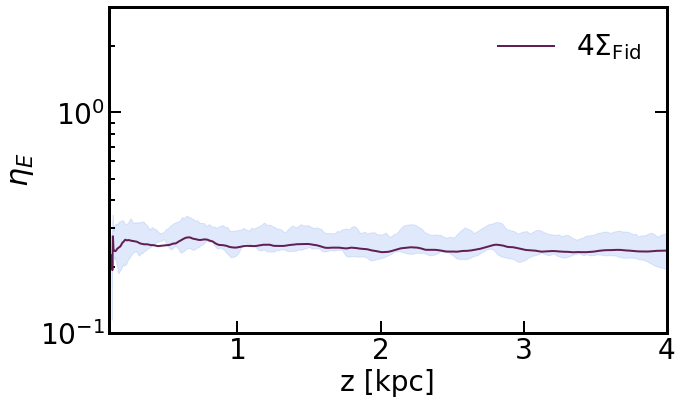

In [10]:
sfr = [ 0.000398107/yr_to_sec, 6.e-5/yr_to_sec ,1.58e-6/yr_to_sec]
sigma_sfr = np.asarray(sfr) 
norm  = 1.e51 * sigma_sfr

kk=0

fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.01, 'hspace':0.01},figsize=(10, 6))
color =sns.color_palette("rocket",n_colors=3)

for folder in folder_list[0:1]:
    data_path = os.path.join('/g/data/jh2/av5889/quokka_myrepo/quokka/sims/', folder, 'Eloading')
    print(data_path)
    
    os.chdir(data_path)
    list_file1 = glob.glob('*.h5')
    list_file = list_file1
    
    infile   = os.path.join('/g/data/jh2/av5889/quokka_myrepo/quokka/sims/', folder, 'metal_uniform.in')

    dom_min, dom_max, ncells = getdomain(infile)
    fac = 1
    zrange = np.linspace(dom_min[2], dom_max[2], (fac*int(ncells[2])))
    xrange = np.linspace(dom_min[0], dom_max[0], (fac*int(ncells[0])))
    yrange = np.linspace(dom_min[1], dom_max[1], (fac*int(ncells[1])))


    dx = (dom_max[0]- dom_min[0])/(fac*int(ncells[0]))
    dy = (dom_max[1]- dom_min[1])/(fac*int(ncells[1]))
    dz = (dom_max[2]- dom_min[2])/(fac*int(ncells[2]))
    dVol = dx * dy * dz

    eout_rate = np.zeros((len(list_file),zrange.shape[0]))
    timestep  = np.zeros(len(list_file))
    

    i=0
    for f in list_file:
        inputfile = os.path.join(data_path, f)
        hf = h5py.File(inputfile ,'r')
        eout_rate[i,:] = np.array(hf.get("EnergyOutflowRate"))
        timestep[i] = np.array(hf.get("Timestep")) 

        i+=1  
        
    mask = (timestep>0.)
    eout_rate_T = eout_rate[mask,:]
    
    etaE = (eout_rate_T+eout_rate_T[::-1])/norm[kk]/2.
    

    eta_tavg = np.average(etaE,axis=0)
    
    
    eta_16 = np.percentile(etaE, 16, axis=0)
    eta_84 = np.percentile(etaE, 84, axis=0)
    
    
    ax.plot(zrange/kpc, eta_tavg, color=color[kk], lw=2.0, ls ='-', label=label[kk])
    
    
    ax.fill_between(zrange/kpc, eta_16, eta_84, ls='-', color='cornflowerblue', alpha=0.2)
    ax.set_xlim(0.1, np.amax(zrange)/kpc)
    
    
    kk+=1
    
ax.legend(frameon=False, ncol=2)
ax.set_ylabel(r'$\eta_E$', fontsize =30)
ax.tick_params(axis='y',  right=True, left=True)
ax.set_yscale('log')
ax.set_ylim(1.e-1, 3)
plt.setp(ax, 'xlabel', 'z [kpc]')

/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SummitData/GasGravity/Production2pc/R4/Eloading
/g/data/jh2/av5889/quokka_myrepo/quokka/sims/SummitData/GasGravity/Production2pc/R8/Eloading


[Text(0.5, 0, 'z [kpc]')]

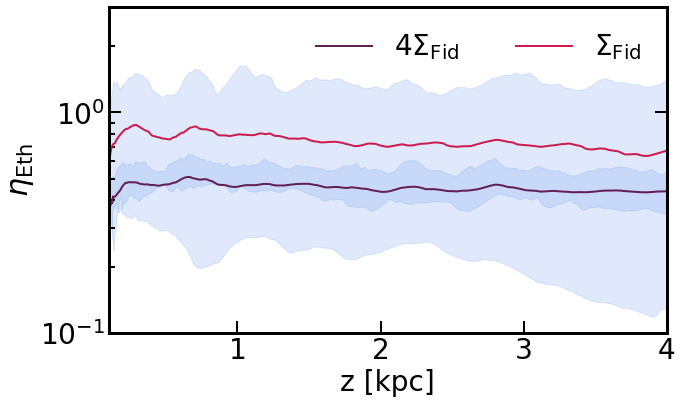

In [15]:
sfr = [ 0.000398107/yr_to_sec, 6.e-5/yr_to_sec ,1.58e-6/yr_to_sec]
sigma_sfr = np.asarray(sfr) 
norm  = 1.e51 * sigma_sfr

kk=0

fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.01, 'hspace':0.01},figsize=(10, 6))
color =sns.color_palette("rocket",n_colors=3)

for folder in folder_list[0:2]:
    data_path = os.path.join('/g/data/jh2/av5889/quokka_myrepo/quokka/sims/', folder, 'Eloading')
    print(data_path)
    
    os.chdir(data_path)
    list_file1 = glob.glob('*.h5')
    list_file = list_file1
    
    infile   = os.path.join('/g/data/jh2/av5889/quokka_myrepo/quokka/sims/', folder, 'metal_uniform.in')

    dom_min, dom_max, ncells = getdomain(infile)
    fac = 1
    zrange = np.linspace(dom_min[2], dom_max[2], (fac*int(ncells[2])))
    xrange = np.linspace(dom_min[0], dom_max[0], (fac*int(ncells[0])))
    yrange = np.linspace(dom_min[1], dom_max[1], (fac*int(ncells[1])))


    dx = (dom_max[0]- dom_min[0])/(fac*int(ncells[0]))
    dy = (dom_max[1]- dom_min[1])/(fac*int(ncells[1]))
    dz = (dom_max[2]- dom_min[2])/(fac*int(ncells[2]))
    dVol = dx * dy * dz

    eout_rate = np.zeros((len(list_file),zrange.shape[0]))
    timestep  = np.zeros(len(list_file))
    

    i=0
    for f in list_file:
        inputfile = os.path.join(data_path, f)
        hf = h5py.File(inputfile ,'r')
        eout_rate[i,:] = np.array(hf.get("ThEnergyOutflowRate"))
        timestep[i] = np.array(hf.get("Timestep")) 

        i+=1  
        
    
    etaE = (eout_rate+eout_rate[::-1])/norm[kk]
    

    eta_tavg = np.average(etaE,axis=0)
    
    
    eta_16 = np.percentile(etaE, 16, axis=0)
    eta_84 = np.percentile(etaE, 84, axis=0)
    
    
    ax.plot(zrange/kpc, eta_tavg, color=color[kk], lw=2.0, ls ='-', label=label[kk])
    
    
    ax.fill_between(zrange/kpc, eta_16, eta_84, ls='-', color='cornflowerblue', alpha=0.2)
    ax.set_xlim(0.1, np.amax(zrange)/kpc)
    
    
    kk+=1
    
ax.legend(frameon=False, ncol=2)
ax.set_ylabel(r'$\eta_{\rm Eth}$', fontsize =30)
ax.tick_params(axis='y',  right=True, left=True)
ax.set_yscale('log')
ax.set_ylim(1.e-1, 3)
plt.setp(ax, 'xlabel', 'z [kpc]')